<a href="https://colab.research.google.com/github/DianaKahar/STQD-Data-science/blob/main/Project_2_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 2 DATA SCIENCE

**Import Necessary Libraries**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

**INTRODUCTION**

Online learning has become an popular platform for learning, providing accessible and diverse opportunities for learners everywhere. There are a vast variety of online learning platform such as coursera, Udemy, edX, LinkedIn Learning, canvas and many more. Udemy is one of the largest online learning platforms. Founded 13 years ago in 2010, it has evolved into a diverse marketplace connecting instructors with students providing an extensive range of subject and courses.

The analysis dives through the Udemy datase and explores various aspects of its courses which includes subjects, pricing, popularity and trends over the years. The purpose of this analysis is to gain valueble insight into the dynamics of Udemy course offeings, understand the learners preference and identify potential areas of improvements.

Examining factors such as course subjects, levels, pricing and subscriber engagement, we aim to provide a comprehensive overview of Udemy learning landscape. As we go through the analysis, we will be be able to uncover patterns, highlight key trends and offer valuble insight that ables us to contribute a deeper understanding of online learning dynamics on the platform.

**Load and Read Data**

In [ ]:
df = pd.read_csv("udemy_courses.csv")
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


**PROBLEM STATEMENT**

While Udemy offers a vast range of course with various subjects and skill level, its important to understand the patterns and trends that can shed light on the factors contributing to the success and challenges of these courses. Inquiries emerge about the impact of course pricing, the distribution of subjects and the correlationg between course level and number of subscribers.

Questions for further analysis:

a) What are the most popular subjects among the subscribers?

b) How does pricing influence the number of subscribers?

c) Is there a correlation between level of courses and the subjects?

d) What is the trend for number of subscribers over the years?

**Data Cleaning and Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [ ]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [ ]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['published_timestamp'])

In [ ]:
df.drop(['course_id', 'url', 'published_timestamp'], axis = 1, inplace = True)
df.sample()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date
2623,jQuery Crash Course: Learn the Essentials of j...,True,50,11262,142,18,All Levels,2.0,Web Development,2015-01-07 03:12:34+00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   course_title      3678 non-null   object             
 1   is_paid           3678 non-null   bool               
 2   price             3678 non-null   int64              
 3   num_subscribers   3678 non-null   int64              
 4   num_reviews       3678 non-null   int64              
 5   num_lectures      3678 non-null   int64              
 6   level             3678 non-null   object             
 7   content_duration  3678 non-null   float64            
 8   subject           3678 non-null   object             
 9   date              3678 non-null   datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 262.3+ KB


In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().any(), df.duplicated().sum()

(False, 0)

In [ ]:
df['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

In [ ]:
dfsub = df.groupby(['subject', 'level'], as_index = False). count()
dfsub

,subject,level,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,date
0,Business Finance,All Levels,693,693,693,693,693,693,693,693
1,Business Finance,Beginner Level,339,339,339,339,339,339,339,339
2,Business Finance,Expert Level,31,31,31,31,31,31,31,31
3,Business Finance,Intermediate Level,128,128,128,128,128,128,128,128
4,Graphic Design,All Levels,298,298,298,298,298,298,298,298
5,Graphic Design,Beginner Level,242,242,242,242,242,242,242,242
6,Graphic Design,Expert Level,5,5,5,5,5,5,5,5
7,Graphic Design,Intermediate Level,57,57,57,57,57,57,57,57
8,Musical Instruments,All Levels,276,276,276,276,276,276,276,276
9,Musical Instruments,Beginner Level,296,296,296,296,296,296,296,296


In [ ]:
df['level'].value_counts()

In [ ]:
df['year'] = df['date'].dt.year

In [ ]:
df.info()

In [ ]:
df['price'].value_counts()

In [ ]:
df['is_paid'].value_counts()

In [ ]:
subject_counts = df['subject'].value_counts()
subject_counts

In [ ]:
labels = subject_counts.index
sizes = subject_counts.values
custom_palette = sns.color_palette('husl', n_colors= len(labels))

**RESULTS**

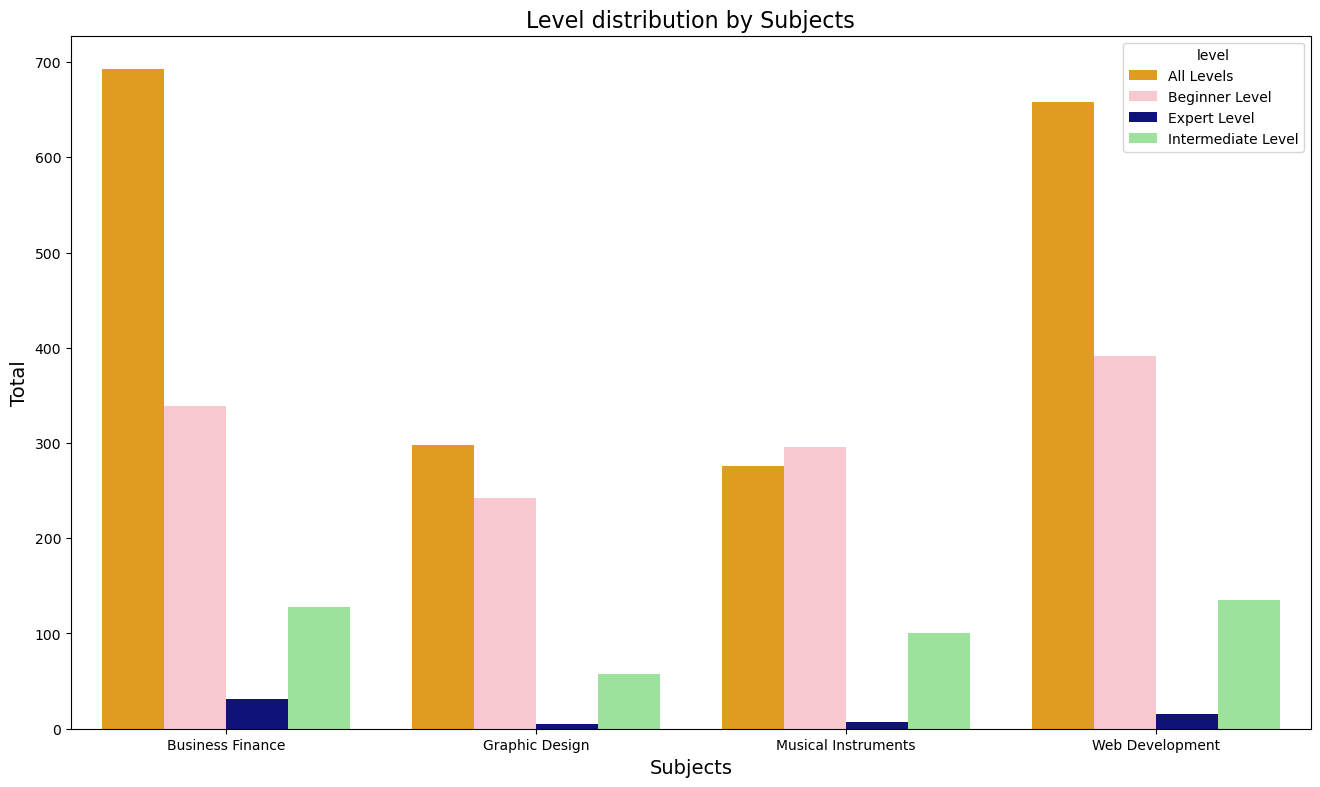

In [ ]:
plt.figure(figsize = (16,9))
sns.barplot(data = dfsub, x ='subject', y ='price', hue ='level', palette = ['orange','pink','darkblue','lightgreen'])

plt.title('Level distribution by Subjects', fontsize =16)
plt.ylabel('Total',fontsize =14)
plt.xlabel('Subjects',fontsize =14);

plt.show()

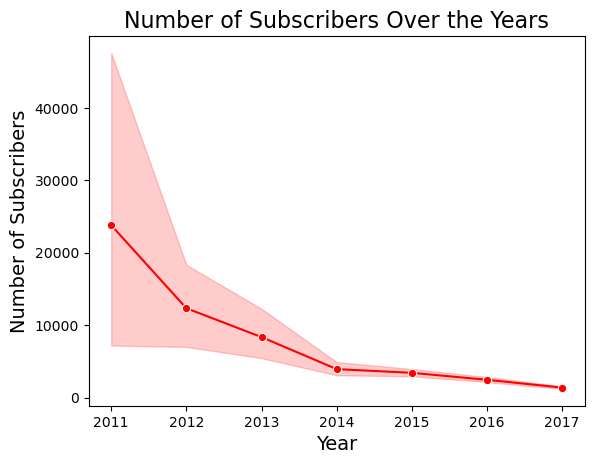

In [ ]:
sns.lineplot(data= df, x= 'year', y= 'num_subscribers', marker= 'o', color= 'red')
plt.title('Number of Subscribers Over the Years', fontsize= 16)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Number of Subscribers', fontsize= 14)

plt.show()

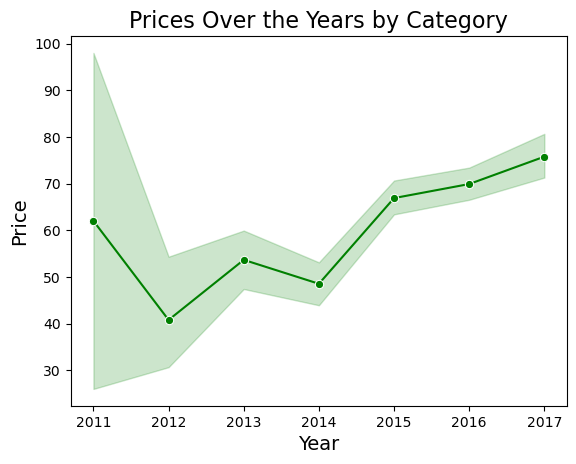

In [ ]:
sns.lineplot(data=df, x='year', y='price', marker='o', color='green')
plt.title('Prices Over the Years by Category', fontsize= 16)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Price', fontsize= 14)

plt.show()

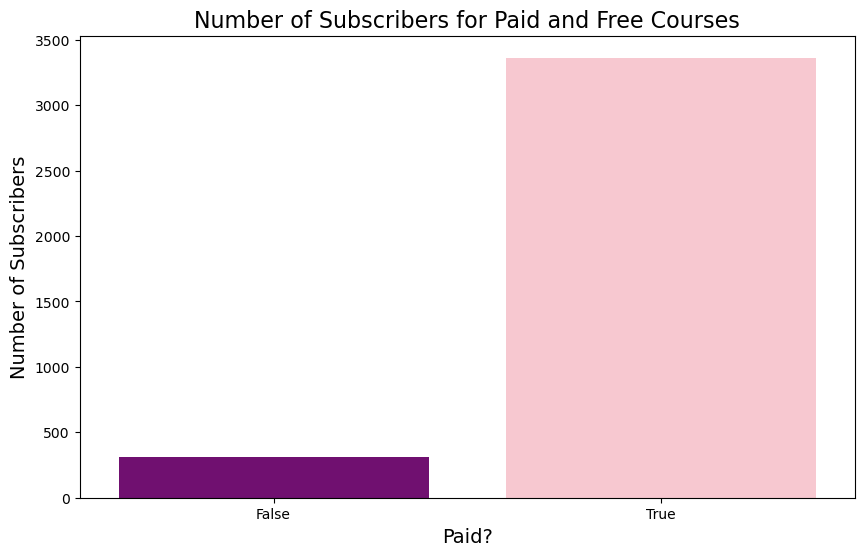

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data= df, x= 'is_paid', palette= ['purple','pink'])
plt.title('Number of Subscribers for Paid and Free Courses', fontsize = 16)
plt.xlabel('Paid?', fontsize = 14)
plt.ylabel('Number of Subscribers', fontsize = 14)

plt.show()

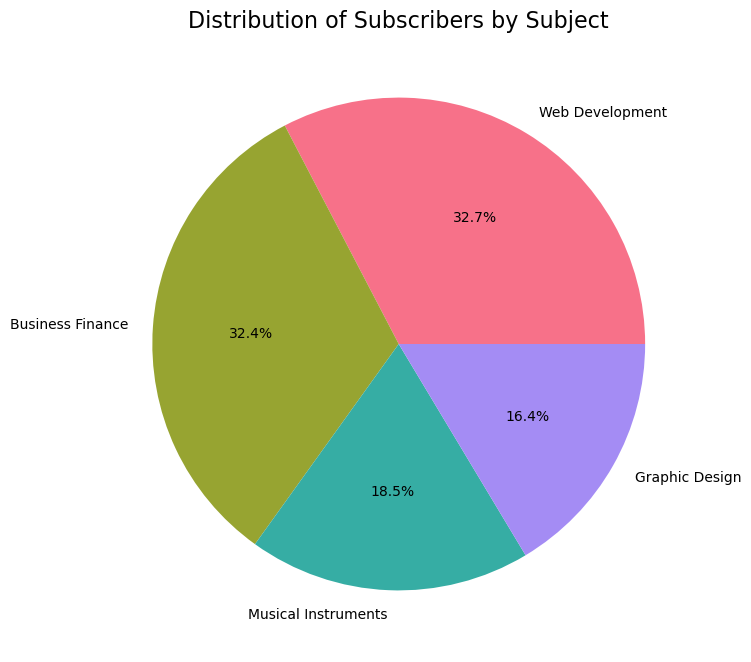

In [ ]:
plt.figure(figsize= (8, 8))
plt.pie(sizes, labels= labels, autopct= '%1.1f%%', colors= custom_palette)
plt.title('Distribution of Subscribers by Subject', fontsize= 16)

plt.show()

**DISCUSSIONS AND INSIGHT**

**CONCLUSIONS**